# Fast Fourier Transform (2)

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
fsamp = 8
t = np.arange(0,1,1/fsamp)
f = np.sin(2 * np.pi* t)
F = np.fft.fft(f)

iF = np.fft.ifft(F)

print(iF.real)
print(iF.imag)

[-1.23259516e-32  7.07106781e-01  1.00000000e+00  7.07106781e-01
  1.22464680e-16 -7.07106781e-01 -1.00000000e+00 -7.07106781e-01]
[0. 0. 0. 0. 0. 0. 0. 0.]


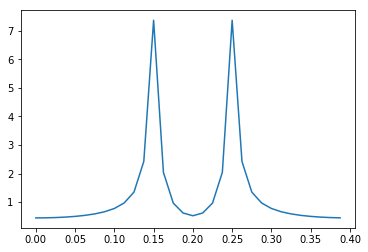

In [3]:
t_max = 0.4
freq  = 0.005
fsamp = t_max / freq

t = np.arange(0,t_max,1/fsamp)
f = np.cos(2 * np.pi * 10 * t) * np.exp(-t * 5)
F = np.fft.fft(f)
iF = np.fft.ifft(F)

F_shifted = np.fft.fftshift(F)
plt.plot(t,np.abs(F_shifted))

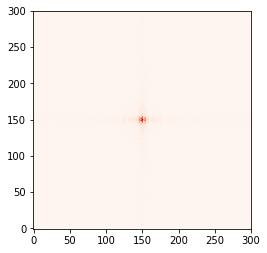

In [4]:
ncols,nrows=300,300
image=np.zeros((ncols,nrows)) 
image[20:30,50:70]=1. 
image[120:180,200:250]=1. 
image[130:170,130:170]=1. 
image[220:250,70:100]=1.
ftimage=np.fft.fft2(image) 
ftshift=np.fft.fftshift(ftimage)
plt.imshow(image,cmap='Reds',origin='lower')
plt.imshow(np.abs(ftimage),cmap='Reds', origin='lower')
plt.imshow(np.abs(ftshift),cmap='Reds', origin='lower')

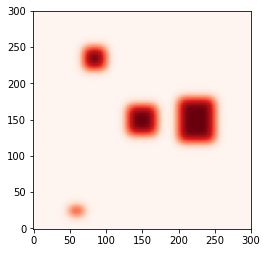

In [5]:
image=np.zeros((ncols,nrows)) 
sigmax, sigmay = 10, 10 
cy, cx = nrows/2, ncols/2 
x=np.linspace(0, nrows, nrows) 
y=np.linspace(0, ncols, ncols) 
X, Y = np.meshgrid(x, y) 
gmask = np.exp(-(((X-cx)/sigmax)**2 + ((Y-cy)/sigmay)**2))
ftgmask = ftshift * gmask
imgmask = np.fft.ifft2(ftgmask) 
plt.imshow(np.abs(ftgmask),cmap='Reds',origin='lower') 
plt.imshow(np.abs(imgmask),cmap='Reds',origin='lower')

In [6]:
fn = 'sunspot.dat'
x, y = np.loadtxt(fn,unpack = True, usecols = [0,1])

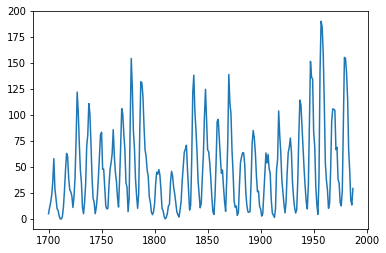

In [7]:
plt.plot(x,y)

In [8]:
F = np.fft.fft(y)

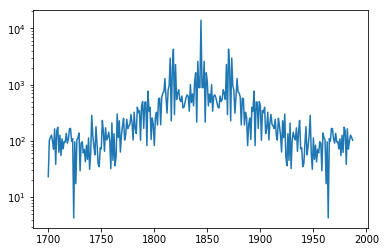

In [17]:
F_shifted = np.fft.fftshift(F)
plt.semilogy(x,np.abs(F_shifted))

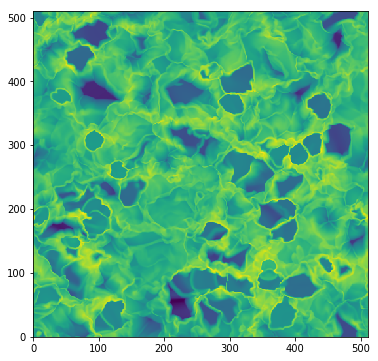

In [20]:
fn = 'U10d4008_density.dat'
y = np.loadtxt(fn)
n = 512
den = np.zeros((n,n))
for j in range(n):
    for i in range(n):
        k = i + (j - 1) * n
        den[j,i] = y[k]
        
x = range(n)
y = range(n)
logden = np.log10(den)

fig = plt.figure(1,figsize=(6,6))
plt.pcolormesh(x,y,logden.T,vmin = -4, vmax = 2)

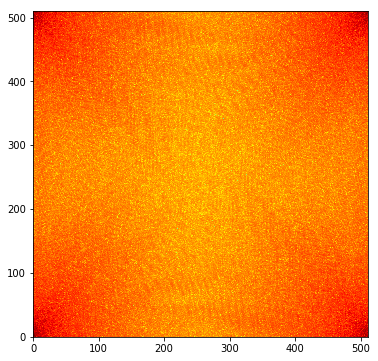

In [26]:
Fden = np.fft.fft2(den)
powF = np.abs(Fden)**2
powF[0,0] = 1.e-10
lpowF = np.log(powF)
cmap ='jet'

fig = plt.figure(1,figsize=(6,6))
plt.pcolormesh(x,y,lpowF.T,cmap=cmap)

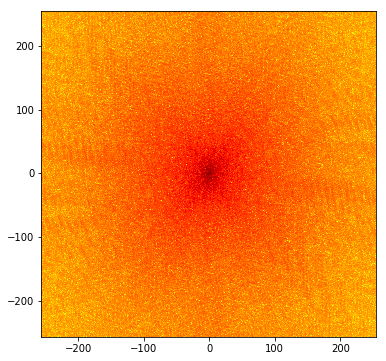

In [23]:
lpow_shift = np.fft.fftshift(lpowF)
k = np.fft.fftfreq(n,1/n)
k_shift = np.fft.fftshift(k)

fig = plt.figure(1,figsize=(6,6))
plt.pcolormesh(k_shift,k_shift,lpow_shift.T,cmap=cmap)

(100000, 10000000000)

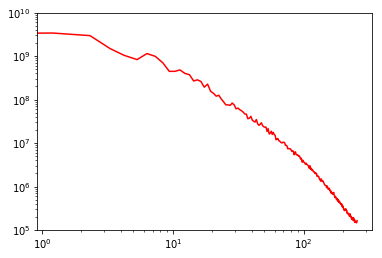

In [29]:
powF_shift=np.fft.fftshift(powF) 
nset=int(n/2) 
k_sum=np.zeros(nset) 
p_sum=np.zeros(nset) 
nfreq=np.zeros(nset) 
for j in range(n): 
    for i in range(n): 
        amp_k = np.sqrt(k_shift[i]**2 +  k_shift[j]**2) 
        kbin=int(amp_k) 
        if(kbin < nset): 
            k_sum[kbin] += amp_k 
            p_sum[kbin] += powF_shift[i,j] 
            nfreq[kbin] += 1.
            
avg_k=k_sum/nfreq 
avg_p=p_sum/nfreq 
plt.loglog(avg_k,avg_p,'r')
plt.ylim(10**5,10**10)